In [3]:
import earthaccess
import xarray as xr
from pprint import pprint

auth = earthaccess.login()


We are already authenticated with NASA EDL


In [5]:
granules = earthaccess.search_data(
    short_name='MODIS_A-JPL-L2P-v2019.0',
    cloud_hosted=True,
    bounding_box=(-10, 20, -5, 25),
    temporal=("2020-02-01", "2020-02-02"),
    count = 1
)

Granules found: 6


In [ ]:
def findDatasetname(): 
    # We'll get 4 collections that match with our keywords
    collections = earthaccess.search_datasets(
        keyword = "SEA SURFACE TEMPERATURE MODIS",
        cloud_hosted = True,
        count = 4
    )
    for collection in collections[0:4]:
        # pprint(collection.summary())
        print(pprint(collection.summary()), collection.abstract(), "\n", collection["umm"]["DOI"], "\n\n")

In [6]:
granules = earthaccess.search_data(
    short_name='MODIS_A-JPL-L2P-v2019.0',
    cloud_hosted=True,
    bounding_box=(-10, 20, -5, 25),
    temporal=("2020-02-01", "2020-02-02"),
    count = 1
)
print(len(granules))

Granules found: 6
1


In [58]:
fileset = earthaccess.open(granules)

print(f" Using {type(fileset[0])} filesystem")

ds = xr.open_mfdataset(fileset, chunks={}, engine='h5netcdf')

ds

 Opening 1 granules, approx size: 0.02 GB


QUEUEING TASKS | : 1it [00:00, 401.95it/s]


PROCESSING TASKS | : 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.70s/it]
COLLECTING RESULTS | : 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3134.76it/s]


 Using <class 'earthaccess.store.EarthAccessFile'> filesystem


<xarray.Dataset>
Dimensions:                      (nj: 2030, ni: 1354, time: 1)
Coordinates:
    lat                          (nj, ni) float32 dask.array<chunksize=(2030, 1354), meta=np.ndarray>
    lon                          (nj, ni) float32 dask.array<chunksize=(2030, 1354), meta=np.ndarray>
  * time                         (time) datetime64[ns] 2020-02-01T02:00:01
Dimensions without coordinates: nj, ni
Data variables:
    sea_surface_temperature      (time, nj, ni) float32 dask.array<chunksize=(1, 2030, 1354), meta=np.ndarray>
    sst_dtime                    (time, nj, ni) timedelta64[ns] dask.array<chunksize=(1, 2030, 1354), meta=np.ndarray>
    quality_level                (time, nj, ni) float32 dask.array<chunksize=(1, 2030, 1354), meta=np.ndarray>
    sses_bias                    (time, nj, ni) float32 dask.array<chunksize=(1, 2030, 1354), meta=np.ndarray>
    sses_standard_deviation      (time, nj, ni) float32 dask.array<chunksize=(1, 2030, 1354), meta=np.ndarray>
    l2p_flags                    (time, nj, ni) int16 dask.array<chunksize=(1, 2030, 1354), meta=np.ndarray>
    sea_surface_temperature_4um  (time, nj, ni) float32 dask.array<chunksize=(1, 2030, 1354), meta=np.ndarray>
    quality_level_4um            (time, nj, ni) float32 dask.array<chunksize=(1, 2030, 1354), meta=np.ndarray>
    sses_bias_4um                (time, nj, ni) float32 dask.array<chunksize=(1, 2030, 1354), meta=np.ndarray>
    sses_standard_deviation_4um  (time, nj, ni) float32 dask.array<chunksize=(1, 2030, 1354), meta=np.ndarray>
    wind_speed                   (time, nj, ni) float32 dask.array<chunksize=(1, 2030, 1354), meta=np.ndarray>
    dt_analysis                  (time, nj, ni) float32 dask.array<chunksize=(1, 2030, 1354), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                CF-1.7, ACDD-1.3
    title:                      MODIS Aqua L2P SST
    summary:                    Sea surface temperature retrievals produced a...
    references:                 GHRSST Data Processing Specification v2r5
    institution:                NASA/JPL/OBPG/RSMAS
    history:                    MODIS L2P created at JPL PO.DAAC
    ...                         ...
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L2P
    cdm_data_type:              swath
    startDirection:             Descending
    endDirection:               Descending
    day_night_flag:             Night

(2030, 1354)
(2030, 1354)
(2030, 1354)


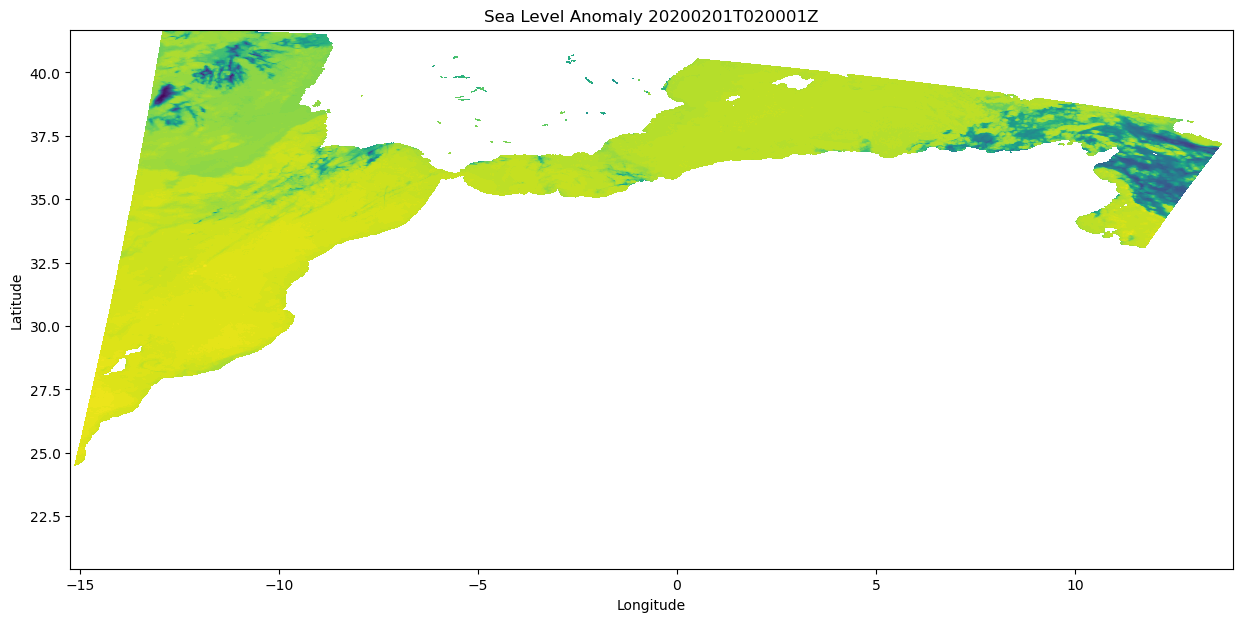

In [104]:
import numpy as np 
z = ds['sea_surface_temperature'][0] 

print(z.shape) 
y = ds['lat'] 
print(y.shape) 
x = ds['lon'] 
print(x.shape) 

# 
plt.figure(figsize=(15,7))
plt.contourf( x,y,z,levels=100)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Sea surface temperature %s'%ds.time_coverage_start)
plt.show() 